<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_Linear_Equation_Problem_linearRegression_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lets try to solve more complex equation. a quadratic equation with 1 Input feature

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.style.use('dark_background')

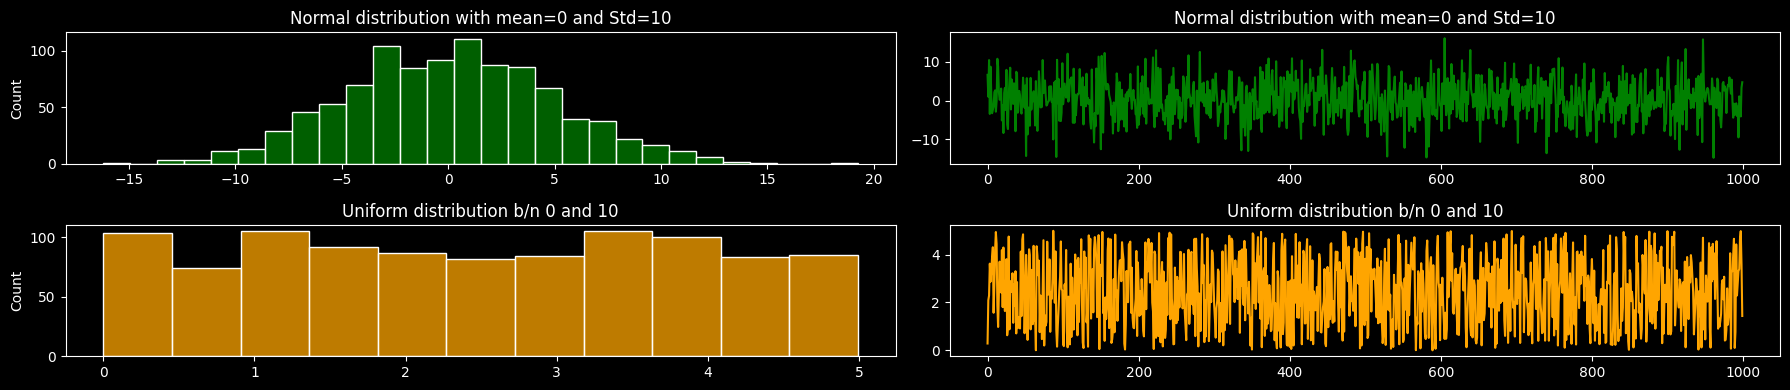

In [ ]:
# Compare uniform and normal distribution
plt.figure(figsize=(18,4))
plt.subplot(2,2,1)
plt.title('Normal distribution with mean=0 and Std=10')
sns.histplot(np.random.normal(0, 5, 1000), color='green')
plt.subplot(2,2,2)
plt.title('Normal distribution with mean=0 and Std=10')
sns.lineplot(np.random.normal(0, 5, 1000), color='green')
plt.subplot(2,2,3)
plt.title('Uniform distribution b/n 0 and 10')
sns.histplot(np.random.uniform(0, 5, 1000), color='orange')
plt.subplot(2,2,4)
plt.title('Uniform distribution b/n 0 and 10')
sns.lineplot(np.random.uniform(0, 5, 1000), color='orange')
plt.tight_layout()
plt.show()

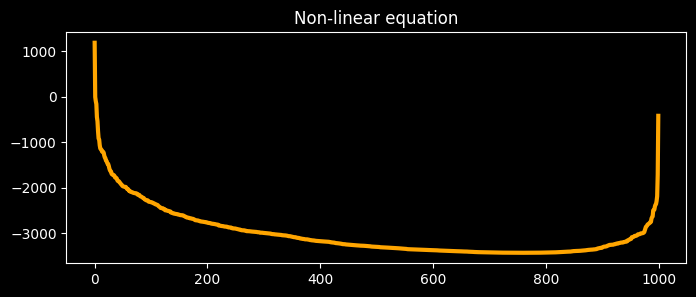

In [ ]:
#create the input data: y = 3x**2 + 19x - 3400
np.random.seed(42)
X = np.random.normal(-10, 10, 1000)
X.sort() # gotta sort it, to get the bell curve. Because the numbers are randomly generated
y = 3*np.square(X) + 19*X- 3400
plt.figure(figsize=(8,3))
sns.lineplot(y, color='orange', linewidth=3.0)
plt.title('Non-linear equation')
plt.show()

# Create the model

In [ ]:
#split the data and prepare for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)
X_train.max(), X_train.min(), y_train.max(), y_test.min()

(16.323820648373907,
 -36.96886642941571,
 -2.3172069309580365,
 -3430.0827617135265)

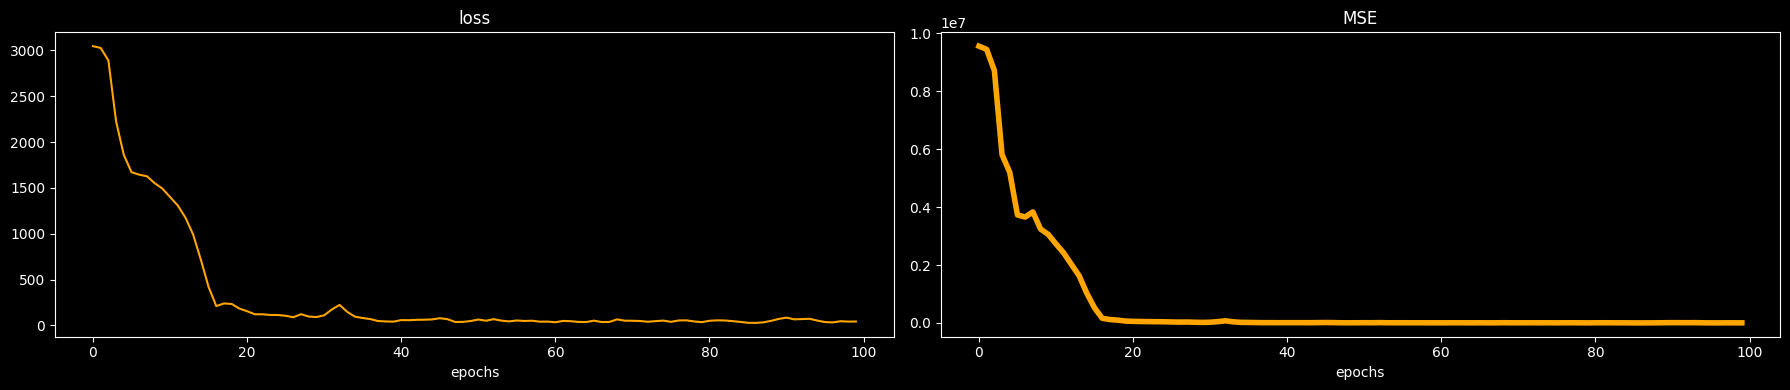

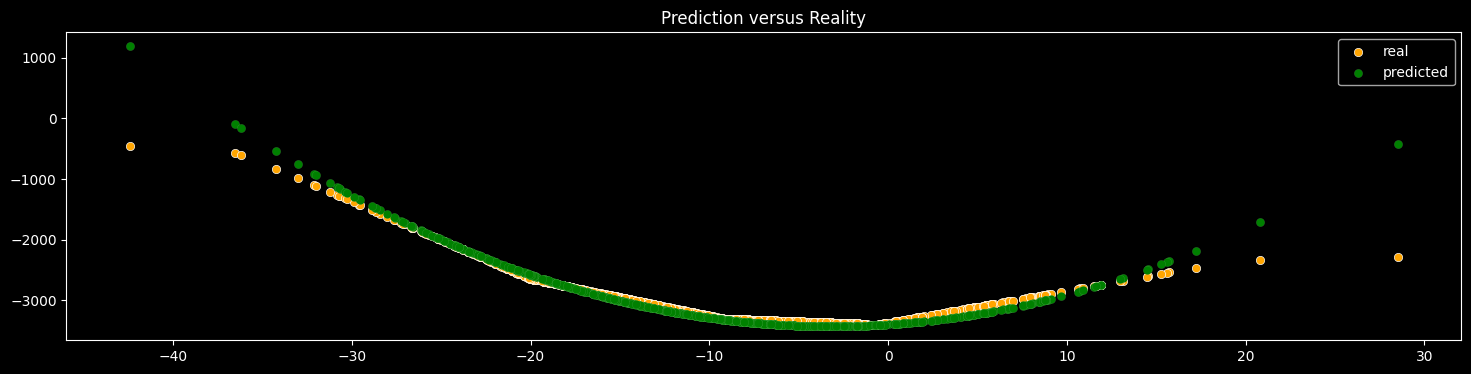

In [ ]:
# Instantiate the model and define the layers, without scaling the input
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, tf.keras.activations.relu, input_dim=1))
model.add(tf.keras.layers.Dense(8, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(8, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1))

# Compile the model, hence check for losses/error, optimize and get accuracy report
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = tf.keras.metrics.mse
)

#fit, evaluate and predict
history = model.fit(X_train, y_train, epochs=100, verbose=0)

#get the history and plot the loss and mse
df = pd.DataFrame(history.history)
df['epochs'] = history.epoch
df.set_index('epochs', inplace=True)
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title('loss')
sns.lineplot(x=df.index, y=df['loss'], color='orange')
plt.ylabel('')

plt.subplot(1,2,2)
plt.title('MSE')
sns.lineplot(x=df.index, y=df['mean_squared_error'], color='orange', linewidth=4)
plt.ylabel('')
plt.tight_layout()

#lets plot the prediction along with actual value
y_pred = model.predict(X_test, verbose=0)

plt.figure(figsize=(18,4))
plt.title('Prediction versus Reality')
sns.scatterplot(x=X_test, y=y_pred.reshape(-1), color='orange')
plt.legend(loc='upper right')

sns.scatterplot(x=X_test, y=y_test, color='green', linewidth=0.05)
plt.legend(labels=['real', 'predicted'], loc='upper right')
plt.show()